In [1]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure
                              # set_boundaries
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 3 & tutorial name: water-adsorption-in-silica
figures will be saved in /docs/sphinx/source/tutorials/figures/level3/water-adsorption-in-silica/


In [7]:
numbermolecule = np.loadtxt("numbermolecule.dat")
time, numbermolecule = numbermolecule.T[0], numbermolecule.T[1]
time /= 1000

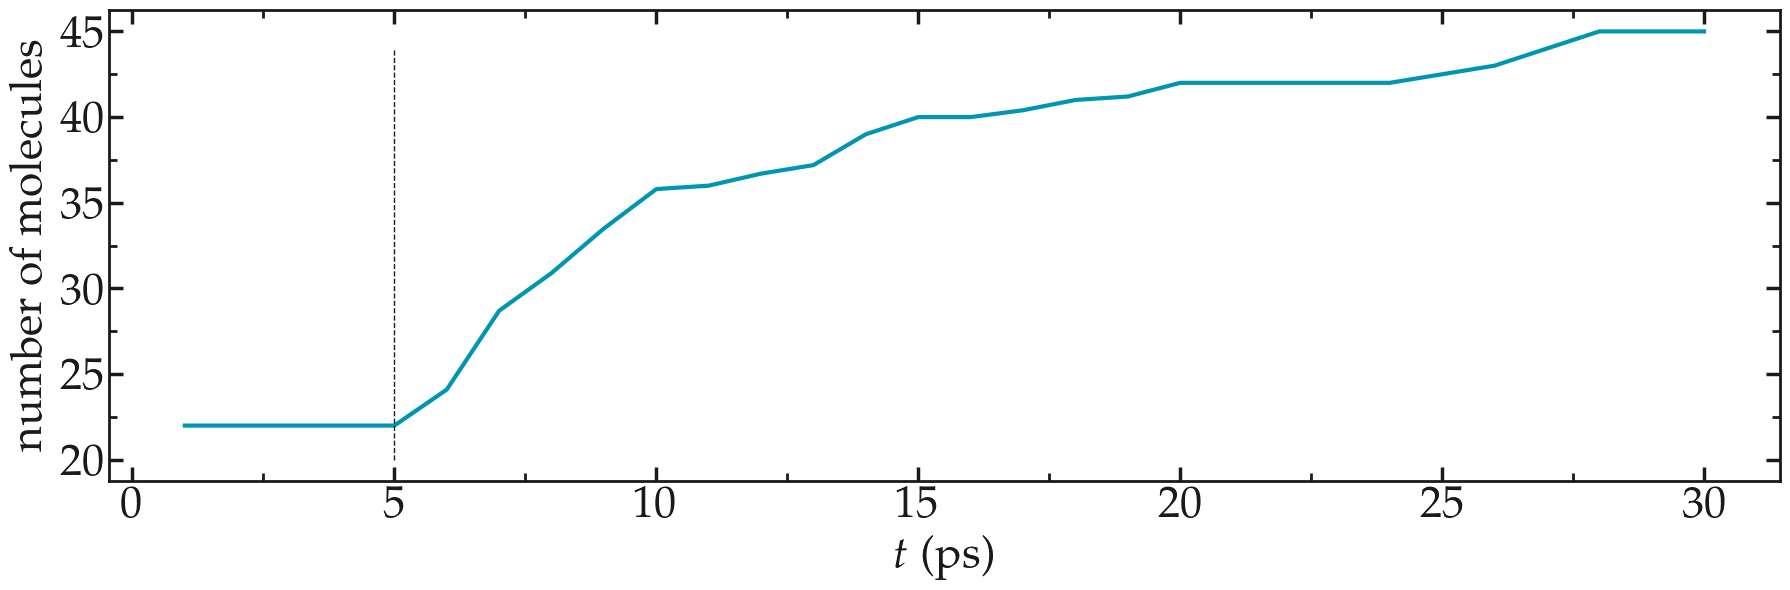

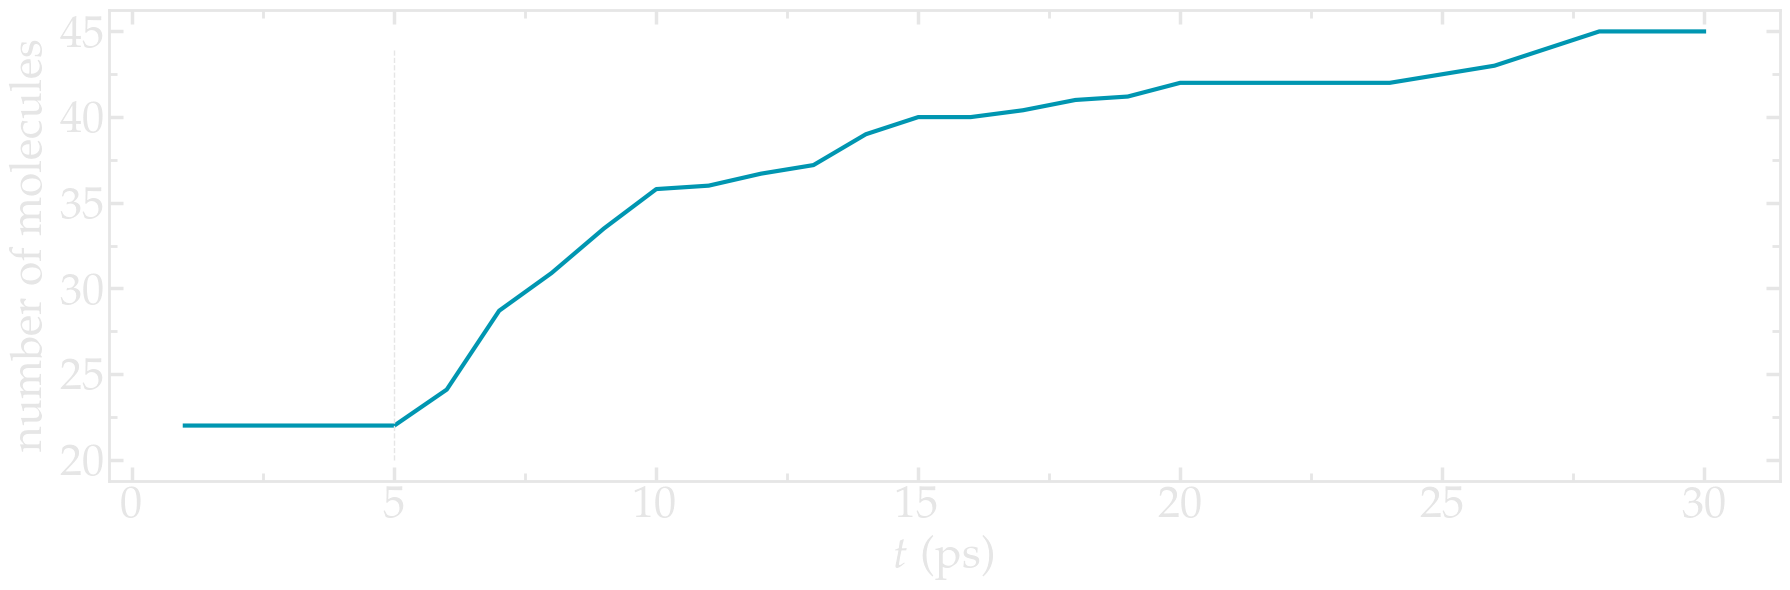

In [8]:
filename = "number_evolution"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time, numbermolecule, color=colors["myblue"], linewidth=3)
    line = np.arange(20, 45)
    ax[-1].plot(line*0 + 5, line, '--', linewidth = 1, color=mygray)
    complete_panel(ax[-1], r'$t$ (ps)', r'number of molecules', legend=False, axis_color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)